<a href="https://colab.research.google.com/github/hannahbanjo/AssociationOfDataScience/blob/main/knowledge_graph_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕸️ Knowledge Graph Workshop
## Association of Data Science - Beginner's Guide

**Duration:** ~60 minutes  
**Level:** Beginner  
**Tools:** Python, NetworkX, RDFLib, Pyvis

---

### Workshop Overview
In this workshop, you'll learn:
1. What knowledge graphs are and why they matter
2. How to build a simple knowledge graph from scratch
3. How to query and visualize knowledge graphs
4. Real-world applications and next steps

### What is a Knowledge Graph?
A knowledge graph is a network of entities (nodes) and their relationships (edges). Think of it as a way to represent information that mimics how we naturally think about connections between concepts.

**Examples:**
- Google's Knowledge Graph (powers search results)
- Facebook's Social Graph
- Medical knowledge bases
- Recommendation systems

## Part 1: Setup (5 minutes)
Let's install the necessary libraries

In [ ]:
# Install required packages
%pip install networkx rdflib pyvis matplotlib -q

print("✅ All packages installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.2/587.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.5 MB/s eta 0:00:00
✅ All packages installed successfully!


In [ ]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from rdflib import Graph, Literal, RDF, URIRef, Namespace
from rdflib.namespace import FOAF, XSD
import json
from IPython.display import HTML, display

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Part 2: Building Your First Knowledge Graph (15 minutes)

Let's build a knowledge graph about universities and their relationships.

### Understanding the Components:
- **Nodes (Entities):** Universities, Students, Courses, Professors
- **Edges (Relationships):** "teaches", "enrolled_in", "offers", "located_in"

In [ ]:
# Create a simple knowledge graph using NetworkX
kg = nx.DiGraph()  # Directed graph for relationships

# Add nodes (entities)
kg.add_node("Stanford", type="University")
kg.add_node("MIT", type="University")
kg.add_node("Dr. Smith", type="Professor")
kg.add_node("Dr. Johnson", type="Professor")
kg.add_node("Alice", type="Student")
kg.add_node("Bob", type="Student")
kg.add_node("Machine Learning", type="Course")
kg.add_node("Data Structures", type="Course")
kg.add_node("California", type="Location")
kg.add_node("Massachusetts", type="Location")

# Add edges (relationships)
kg.add_edge("Stanford", "California", relationship="located_in")
kg.add_edge("MIT", "Massachusetts", relationship="located_in")
kg.add_edge("Dr. Smith", "Stanford", relationship="works_at")
kg.add_edge("Dr. Johnson", "MIT", relationship="works_at")
kg.add_edge("Dr. Smith", "Machine Learning", relationship="teaches")
kg.add_edge("Dr. Johnson", "Data Structures", relationship="teaches")
kg.add_edge("Alice", "Stanford", relationship="studies_at")
kg.add_edge("Bob", "MIT", relationship="studies_at")
kg.add_edge("Alice", "Machine Learning", relationship="enrolled_in")
kg.add_edge("Bob", "Data Structures", relationship="enrolled_in")
kg.add_edge("Stanford", "Machine Learning", relationship="offers")
kg.add_edge("MIT", "Data Structures", relationship="offers")

print(f"✅ Knowledge graph created!")
print(f"   Nodes: {kg.number_of_nodes()}")
print(f"   Edges: {kg.number_of_edges()}")

✅ Knowledge graph created!
   Nodes: 10
   Edges: 12


### Visualize the Knowledge Graph

/tmp/ipython-input-2478249074.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


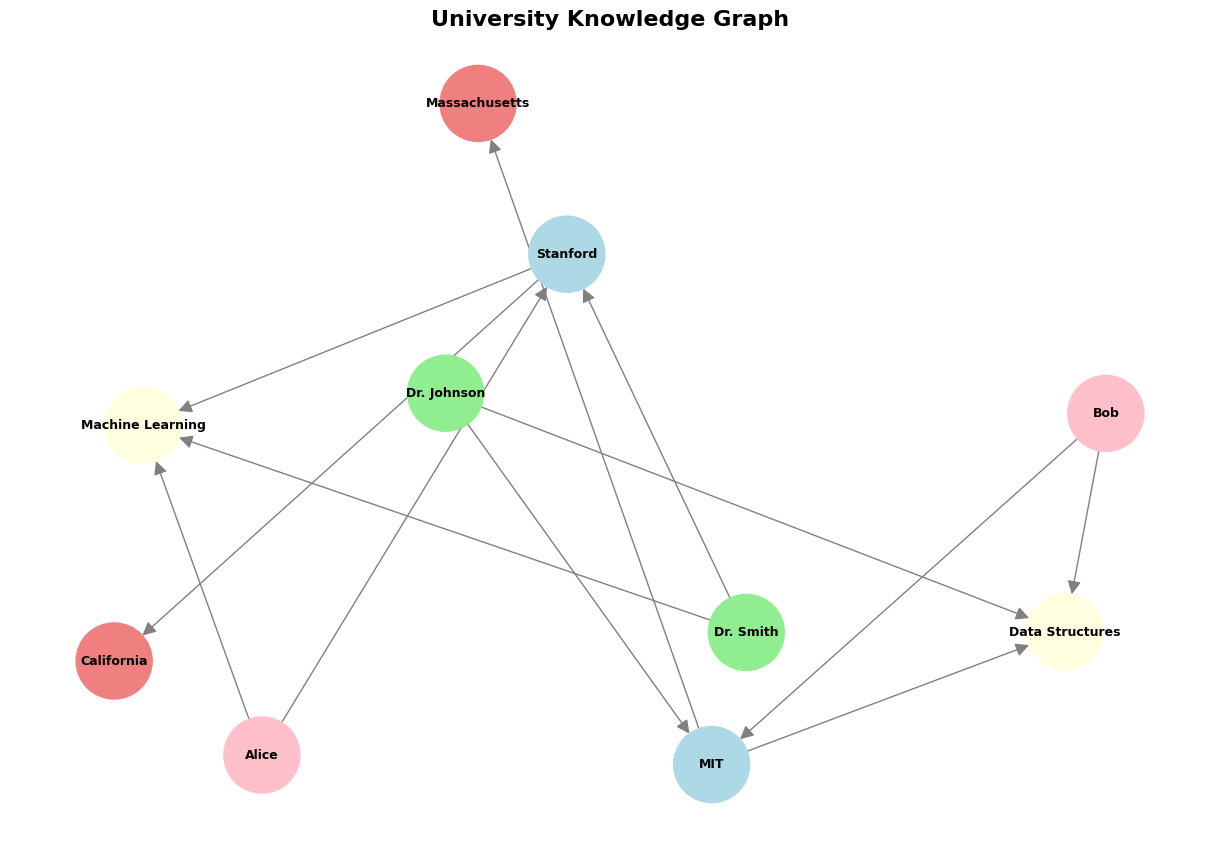


🎨 Color Legend:
   🔵 Blue: Universities
   🟢 Green: Professors
   🔴 Pink: Students
   🟡 Yellow: Courses
   🟠 Coral: Locations


In [ ]:
# Simple visualization with matplotlib
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(kg, k=2, iterations=50)

# Draw nodes by type with different colors
node_colors = []
for node in kg.nodes():
    node_type = kg.nodes[node].get('type', 'Unknown')
    if node_type == 'University':
        node_colors.append('lightblue')
    elif node_type == 'Professor':
        node_colors.append('lightgreen')
    elif node_type == 'Student':
        node_colors.append('pink')
    elif node_type == 'Course':
        node_colors.append('lightyellow')
    elif node_type == 'Location':
        node_colors.append('lightcoral')
    else:
        node_colors.append('gray')

nx.draw(kg, pos, with_labels=True, node_color=node_colors,
        node_size=3000, font_size=9, font_weight='bold',
        arrows=True, arrowsize=20, edge_color='gray')

plt.title("University Knowledge Graph", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Legend
print("\n🎨 Color Legend:")
print("   🔵 Blue: Universities")
print("   🟢 Green: Professors")
print("   🔴 Pink: Students")
print("   🟡 Yellow: Courses")
print("   🟠 Coral: Locations")

## Part 3: Interactive Visualization (10 minutes)

Let's create an interactive version using Pyvis!

In [ ]:
# Create interactive visualization
net = Network(height='600px', width='100%', bgcolor='#222222', font_color='white', notebook=True, cdn_resources='in_line')
net.barnes_hut()

# Add nodes with colors based on type
for node in kg.nodes():
    node_type = kg.nodes[node].get('type', 'Unknown')
    color_map = {
        'University': '#3498db',
        'Professor': '#2ecc71',
        'Student': '#e74c3c',
        'Course': '#f39c12',
        'Location': '#9b59b6'
    }
    net.add_node(node, label=node, title=f"{node} ({node_type})",
                 color=color_map.get(node_type, 'gray'))

# Add edges with labels
for edge in kg.edges():
    relationship = kg.edges[edge].get('relationship', '')
    net.add_edge(edge[0], edge[1], title=relationship, label=relationship)

# Generate and display
try:
    # Try the newer method first
    html = net.generate_html()
    display(HTML(html))
    print("\n✅ Interactive graph displayed above!")
except Exception as e:
    # Fallback: save to file and read
    print(f"Note: Using fallback rendering method")
    net.save_graph('knowledge_graph.html')
    with open('knowledge_graph.html', 'r', encoding='utf-8') as f:
        html_content = f.read()
    display(HTML(html_content))
    print("\n✅ Interactive graph displayed above!")

print("\n💡 Tip: Try clicking and dragging nodes! Hover over them to see details.")


✅ Interactive graph displayed above!

💡 Tip: Try clicking and dragging nodes! Hover over them to see details.


**💡 Interactive Features:**
- Click and drag nodes to rearrange
- Hover over nodes to see entity type
- Hover over edges to see relationship type
- Zoom in/out with mouse wheel
- The graph uses physics simulation for natural layout

## Part 4: Querying the Knowledge Graph (15 minutes)

Now let's learn how to extract insights from our knowledge graph!

In [ ]:
# Query 1: Find all students
students = [node for node in kg.nodes() if kg.nodes[node].get('type') == 'Student']
print("👨‍🎓 Students in our graph:")
for student in students:
    print(f"   - {student}")

👨‍🎓 Students in our graph:
   - Alice
   - Bob


In [ ]:
# Query 2: Find where each student studies
print("\n🏫 Where students study:")
for student in students:
    for successor in kg.successors(student):
        if kg.nodes[successor].get('type') == 'University':
            relationship = kg.edges[student, successor].get('relationship')
            print(f"   {student} {relationship} {successor}")


🏫 Where students study:
   Alice studies_at Stanford
   Bob studies_at MIT


In [ ]:
# Query 3: Find what courses each student is taking
print("\n📚 Student enrollments:")
for student in students:
    courses = []
    for successor in kg.successors(student):
        if kg.nodes[successor].get('type') == 'Course':
            courses.append(successor)
    print(f"   {student}: {', '.join(courses)}")


📚 Student enrollments:
   Alice: Machine Learning
   Bob: Data Structures


In [ ]:
# Query 4: Find professors and what they teach
print("\n👨‍🏫 Professors and their courses:")
professors = [node for node in kg.nodes() if kg.nodes[node].get('type') == 'Professor']
for prof in professors:
    courses = []
    university = None
    for successor in kg.successors(prof):
        if kg.nodes[successor].get('type') == 'Course':
            courses.append(successor)
        if kg.nodes[successor].get('type') == 'University':
            university = successor
    print(f"   {prof} at {university} teaches: {', '.join(courses)}")


👨‍🏫 Professors and their courses:
   Dr. Smith at Stanford teaches: Machine Learning
   Dr. Johnson at MIT teaches: Data Structures


In [ ]:
# Query 5: Path finding - Can we connect two entities?
print("\n🔍 Finding connections:")
try:
    path = nx.shortest_path(kg, "Alice", "Massachusetts")
    print(f"   Path from Alice to Massachusetts: {' → '.join(path)}")
except nx.NetworkXNoPath:
    print("   No path found!")

# Let's find a connection that exists
try:
    path = nx.shortest_path(kg, "Alice", "Dr. Smith")
    print(f"   Path from Alice to Dr. Smith: {' → '.join(path)}")
except nx.NetworkXNoPath:
    print("   No path found!")


🔍 Finding connections:
   No path found!
   No path found!


## Part 5: RDF and Semantic Knowledge Graphs (10 minutes)

RDF (Resource Description Framework) is a W3C standard for representing knowledge graphs. It uses triples: (Subject, Predicate, Object)

In [ ]:
# Create an RDF knowledge graph
g = Graph()

# Define namespace
EX = Namespace("http://example.org/")

# Add triples (subject, predicate, object)
alice = URIRef(EX.Alice)
bob = URIRef(EX.Bob)
stanford = URIRef(EX.Stanford)
ml_course = URIRef(EX.MachineLearning)

# Add facts about Alice
g.add((alice, RDF.type, EX.Student))
g.add((alice, EX.name, Literal("Alice", datatype=XSD.string)))
g.add((alice, EX.age, Literal(21, datatype=XSD.integer)))
g.add((alice, EX.studiesAt, stanford))
g.add((alice, EX.enrolledIn, ml_course))

# Add facts about Bob
g.add((bob, RDF.type, EX.Student))
g.add((bob, EX.name, Literal("Bob", datatype=XSD.string)))
g.add((bob, EX.age, Literal(22, datatype=XSD.integer)))

# Add facts about Stanford
g.add((stanford, RDF.type, EX.University))
g.add((stanford, EX.name, Literal("Stanford University", datatype=XSD.string)))
g.add((stanford, EX.offers, ml_course))

print(f"✅ RDF graph created with {len(g)} triples!")
print("\nSample triples:")
for i, (s, p, o) in enumerate(g):
    if i < 5:
        print(f"   {s.split('/')[-1]} -- {p.split('/')[-1]} --> {o}")

✅ RDF graph created with 11 triples!

Sample triples:
   Alice -- studiesAt --> http://example.org/Stanford
   Bob -- 22-rdf-syntax-ns#type --> http://example.org/Student
   Alice -- enrolledIn --> http://example.org/MachineLearning
   Stanford -- offers --> http://example.org/MachineLearning
   Bob -- age --> 22


In [ ]:
# Query RDF graph using SPARQL
query = """
    SELECT ?student ?name ?age
    WHERE {
        ?student rdf:type <http://example.org/Student> .
        ?student <http://example.org/name> ?name .
        ?student <http://example.org/age> ?age .
    }
"""

print("\n📊 SPARQL Query Results:")
print("   Students in our database:")
results = g.query(query)
for row in results:
    print(f"   - {row.name} (age: {row.age})")


📊 SPARQL Query Results:
   Students in our database:
   - Alice (age: 21)
   - Bob (age: 22)


## Part 6: Hands-On Exercise (5 minutes)

**Your Turn!** Extend the knowledge graph with:
1. A new student
2. A new course
3. Connect them appropriately

In [ ]:
# TODO: Add your code here!
# Example structure:
# kg.add_node("YourName", type="Student")
# kg.add_node("YourCourse", type="Course")
# kg.add_edge("YourName", "YourCourse", relationship="enrolled_in")

# Your code here:


## Part 7: Real-World Applications (5 minutes)

### Where are Knowledge Graphs Used?

1. **Search Engines** (Google Knowledge Graph)
   - Understand entity relationships
   - Provide direct answers to questions

2. **Recommendation Systems** (Amazon, Netflix)
   - "People who bought X also bought Y"
   - Content-based recommendations

3. **Drug Discovery** (Pharmaceutical companies)
   - Connect diseases, genes, and drugs
   - Identify potential treatments

4. **Fraud Detection** (Banks)
   - Identify suspicious transaction patterns
   - Connect entities across networks

5. **AI/ML Applications**
   - Knowledge Graph Embeddings (TransE, ComplEx)
   - Graph Neural Networks (GCN, GAT)
   - RAG (Retrieval-Augmented Generation) for LLMs

## Example: Simple Recommendation System

In [ ]:
# Simple course recommendation based on graph structure
def recommend_courses(kg, student_name, max_recommendations=3):
    """
    Recommend courses based on:
    1. What university the student attends
    2. What other students at that university are taking
    """
    # Find student's university
    student_university = None
    for successor in kg.successors(student_name):
        if kg.nodes[successor].get('type') == 'University':
            student_university = successor
            break

    if not student_university:
        return []

    # Find courses offered by that university
    offered_courses = []
    for successor in kg.successors(student_university):
        if kg.nodes[successor].get('type') == 'Course':
            offered_courses.append(successor)

    # Find courses student is already taking
    enrolled_courses = []
    for successor in kg.successors(student_name):
        if kg.nodes[successor].get('type') == 'Course':
            enrolled_courses.append(successor)

    # Recommend courses not yet taken
    recommendations = [c for c in offered_courses if c not in enrolled_courses]

    return recommendations[:max_recommendations]

# Test the recommendation system
print("\n🎯 Course Recommendations:")
for student in students:
    recs = recommend_courses(kg, student)
    if recs:
        print(f"   For {student}: {', '.join(recs)}")
    else:
        print(f"   For {student}: No new courses to recommend")


🎯 Course Recommendations:
   For Alice: No new courses to recommend
   For Bob: No new courses to recommend


## Part 8: Next Steps and Resources (5 minutes)

### Open Source Tools to Explore:

1. **Graph Databases:**
   - Neo4j (most popular)
   - Apache Jena (RDF/SPARQL)
   - Amazon Neptune

2. **Python Libraries:**
   - NetworkX (what we used!)
   - PyTorch Geometric (Graph Neural Networks)
   - DGL (Deep Graph Library)
   - RDFLib (semantic web)

3. **Visualization:**
   - Pyvis (what we used!)
   - Gephi (standalone tool)
   - Graphviz

### Learning Resources:

- **Stanford CS224W:** Machine Learning with Graphs (free online)
- **Neo4j Graph Academy:** Free courses on graph databases
- **Knowledge Graphs book** by Hogan et al. (free PDF)
- **Papers:**
  - "A Survey on Knowledge Graphs" (2021)
  - "Representation Learning on Graphs" (2020)

### Project Ideas:

1. Build a movie recommendation system using IMDb data
2. Create a research paper citation network
3. Map your university's course prerequisites
4. Build a personal knowledge management system
5. Analyze social media networks

## Summary

Today you learned:
- ✅ What knowledge graphs are and their applications
- ✅ How to build knowledge graphs using NetworkX
- ✅ How to visualize graphs interactively
- ✅ How to query graphs to extract insights
- ✅ Introduction to RDF and SPARQL
- ✅ Real-world use cases

### Thank you for participating! 🎉

**Questions? Feedback?**  
Feel free to reach out to your Association of Data Science leadership!

---

*This workshop was created for educational purposes using open-source tools.*

In [ ]:
# Bonus: Export your knowledge graph
import json

# Export to JSON
data = {
    'nodes': [{'id': node, **kg.nodes[node]} for node in kg.nodes()],
    'edges': [{'source': edge[0], 'target': edge[1], **kg.edges[edge]}
              for edge in kg.edges()]
}

with open('knowledge_graph.json', 'w') as f:
    json.dump(data, f, indent=2)

print("✅ Knowledge graph exported to knowledge_graph.json")

# You can also export to GraphML format for use in other tools
nx.write_graphml(kg, "knowledge_graph.graphml")
print("✅ Knowledge graph exported to knowledge_graph.graphml")

✅ Knowledge graph exported to knowledge_graph.json
✅ Knowledge graph exported to knowledge_graph.graphml
